<a href="https://www.kaggle.com/code/kruthikajanvekar/customer-churn-ann?scriptVersionId=251301197" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df= pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()
#print(df.shape)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df= pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [12]:
X= df.drop(columns=['Exited'])
y= df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [13]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [14]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [15]:
X_train.shape

(8000, 11)

In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [17]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [18]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-07-19 05:45:17.142157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752903917.478327      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752903917.577141      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [19]:
model= Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-19 05:45:36.232578: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss= 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [22]:
history= model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7728 - loss: 0.5641 - val_accuracy: 0.8087 - val_loss: 0.4704
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8083 - loss: 0.4492 - val_accuracy: 0.8131 - val_loss: 0.4392
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8169 - loss: 0.4292 - val_accuracy: 0.8163 - val_loss: 0.4265
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8344 - loss: 0.4025 - val_accuracy: 0.8244 - val_loss: 0.4142
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8329 - loss: 0.3973 - val_accuracy: 0.8263 - val_loss: 0.4020
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8412 - loss: 0.3832 - val_accuracy: 0.8350 - val_loss: 0.3908
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8360 - loss: 0.3897 - val_accuracy: 0.8400 - val_loss: 0.3793
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8504 - loss: 0.3648 - val_accu

In [23]:
model.layers[1].get_weights()

[array([[ 0.09811106, -0.00623205, -0.56151325, -0.40287825,  0.23639432,
          0.04290641, -0.5564597 , -0.1022385 , -1.2855003 , -0.09659715,
          0.01870832],
        [ 0.67000616, -0.32102954, -0.00918393, -0.35324097, -0.12526068,
          0.10374589,  0.77340513,  0.24546069, -0.7562002 , -0.22257015,
         -0.37407115],
        [-0.41243613,  0.16076617, -1.1053843 ,  0.22355133,  0.29037195,
          0.21401548, -0.19264041, -0.48616236,  0.19174628,  0.47047532,
         -0.3300558 ],
        [-2.31702   , -0.36110613,  0.9343939 ,  0.21035212,  0.13719963,
          0.08266982,  0.11547064, -0.5033825 ,  0.24131626, -0.9363143 ,
          0.14331353],
        [-2.1002662 , -0.29878134,  0.2365175 , -0.04141796, -0.34551632,
         -0.47468802,  0.6893146 ,  0.36542955,  0.8960245 , -0.6423804 ,
         -0.54332113],
        [-0.13946347, -0.2783192 , -1.177768  ,  0.16054776, -0.349892  ,
         -0.46511135, -0.01722283, -1.1887461 , -0.06274544,  0.2725381

In [24]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.02208591],
       [0.06437384],
       [0.05705686],
       ...,
       [0.004386  ],
       [0.06405751],
       [0.3566996 ]], dtype=float32)

In [25]:
y_log= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [26]:
y_pred= np.where(y_log > 0.5, 1, 0)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.863

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.7903125286102295,
  0.8114062547683716,
  0.8193749785423279,
  0.8270312547683716,
  0.8309375047683716,
  0.8370312452316284,
  0.84375,
  0.8473437428474426,
  0.8504687547683716,
  0.8521875143051147,
  0.8573437333106995,
  0.8568750023841858,
  0.8600000143051147,
  0.8614062666893005,
  0.8590624928474426,
  0.8614062666893005,
  0.8623437285423279,
  0.8606250286102295,
  0.8610937595367432,
  0.8629687428474426,
  0.8631250262260437,
  0.8621875047683716,
  0.8646875023841858,
  0.8628125190734863,
  0.8631250262260437,
  0.8645312786102295,
  0.8653125166893005,
  0.8646875023841858,
  0.8643749952316284,
  0.864062488079071,
  0.8654687404632568,
  0.8646875023841858,
  0.8639062643051147,
  0.8642187714576721,
  0.8654687404632568,
  0.8646875023841858,
  0.8665624856948853,
  0.8657812476158142,
  0.8668749928474426,
  0.8662499785423279,
  0.8648437261581421,
  0.8648437261581421,
  0.8662499785423279,
  0.8654687404632568,
  0.8667187690734863,
  0.864531

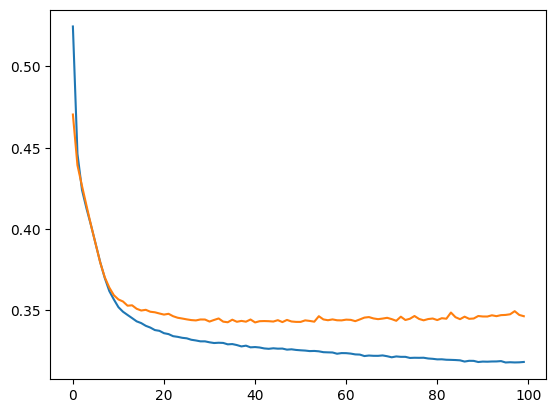

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

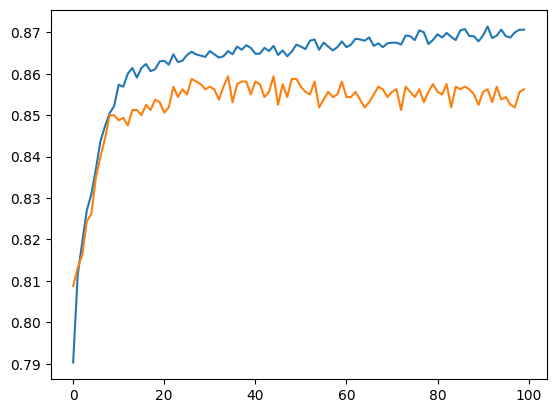

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])